# **Imports**

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from pathlib import Path
import random

# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Test**

In [ ]:
def test(saved_model, device, test_loader):
    """
    Summary:
      Tests a saved model on a random image from the test dataset
      Displays the image, the predicted label and the actual label
    Args:
      saved_model: the pre-trained model to be evaluated
      device: the device on which to perform the evaluation
      test_loader: DataLoader object for loading the test dataset
    Returns:
      None: it does not return any values
    """

    saved_model.eval()

    with torch.no_grad():
        batch = random.choice(list(test_loader))
        images, labels = batch

        index = random.randint(0, len(images) - 1)
        image = images[index].unsqueeze(0).to(device)
        label = labels[index].item()

        output = saved_model(image)
        pred = output.argmax(dim=1, keepdim=True).item()

        plt.figure(figsize=(2, 2))
        plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')
        plt.show()
        print(f'Predicted: {pred}, Actual: {label}')

# **Model with lr = 0.5 Experiment**

**Define Class**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_1(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


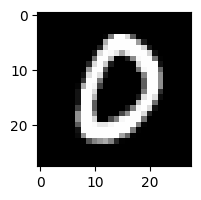

Predicted: 1, Actual: 0

Iter: 2


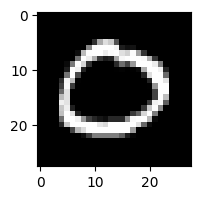

Predicted: 1, Actual: 0

Iter: 3


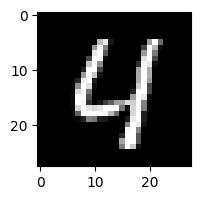

Predicted: 1, Actual: 4

Iter: 4


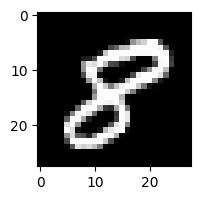

Predicted: 1, Actual: 8

Iter: 5


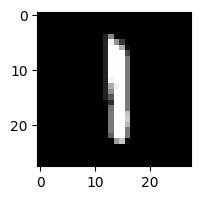

Predicted: 1, Actual: 1

Iter: 6


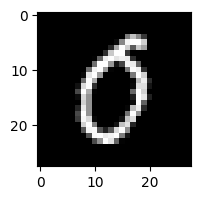

Predicted: 1, Actual: 0

Iter: 7


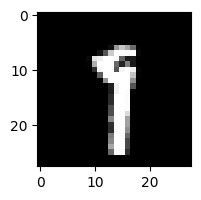

Predicted: 1, Actual: 9

Iter: 8


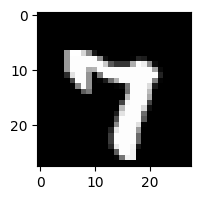

Predicted: 1, Actual: 7

Iter: 9


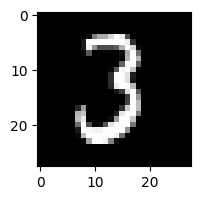

Predicted: 1, Actual: 3

Iter: 10


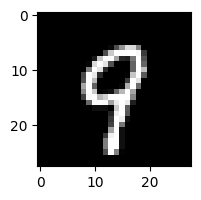

Predicted: 1, Actual: 9



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_1('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.5_lr.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with lr = 0.1 Experiment**

**Define Class**

In [ ]:
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_2(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_2()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


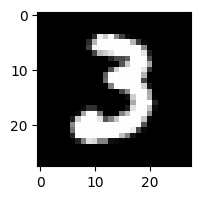

Predicted: 3, Actual: 3

Iter: 2


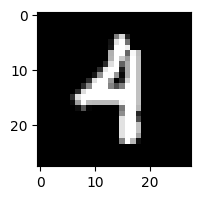

Predicted: 4, Actual: 4

Iter: 3


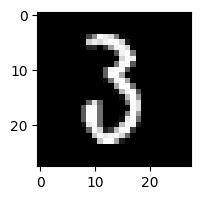

Predicted: 3, Actual: 3

Iter: 4


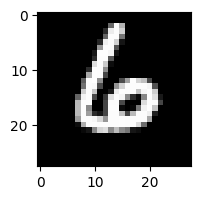

Predicted: 6, Actual: 6

Iter: 5


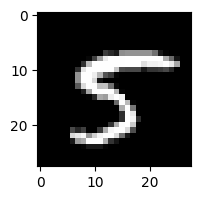

Predicted: 5, Actual: 5

Iter: 6


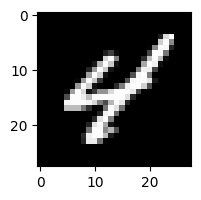

Predicted: 4, Actual: 4

Iter: 7


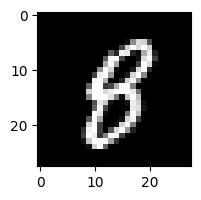

Predicted: 8, Actual: 8

Iter: 8


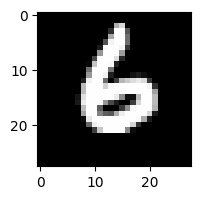

Predicted: 6, Actual: 6

Iter: 9


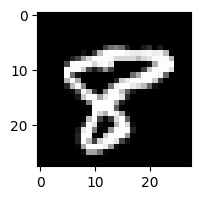

Predicted: 8, Actual: 8

Iter: 10


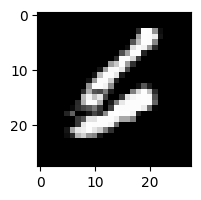

Predicted: 6, Actual: 6



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_2('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.1_lr.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with lr = 0.01 Experiment**

**Define Class**

In [ ]:
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_3(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_3()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


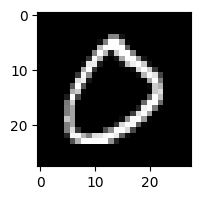

Predicted: 0, Actual: 0

Iter: 2


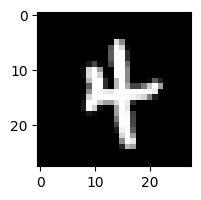

Predicted: 4, Actual: 4

Iter: 3


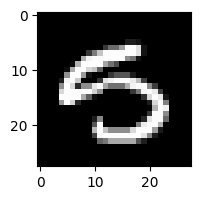

Predicted: 5, Actual: 5

Iter: 4


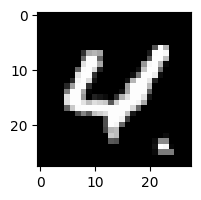

Predicted: 4, Actual: 4

Iter: 5


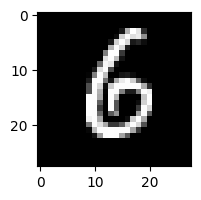

Predicted: 6, Actual: 6

Iter: 6


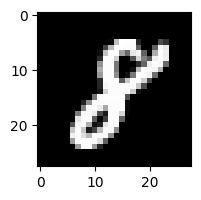

Predicted: 8, Actual: 8

Iter: 7


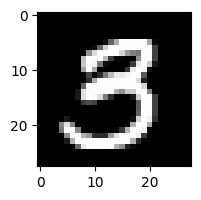

Predicted: 3, Actual: 3

Iter: 8


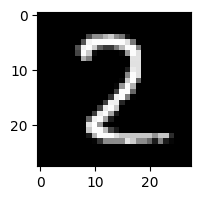

Predicted: 2, Actual: 2

Iter: 9


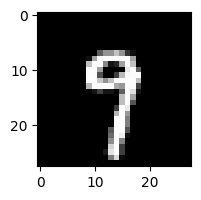

Predicted: 9, Actual: 9

Iter: 10


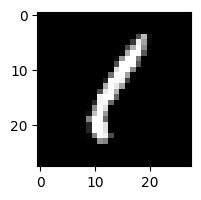

Predicted: 1, Actual: 1



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_3('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.01_lr.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with lr = 0.001 Experiment**

**Define Class**

In [ ]:
class Net_4(nn.Module):
    def __init__(self):
        super(Net_4, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_4(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_4()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


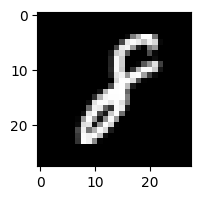

Predicted: 8, Actual: 8

Iter: 2


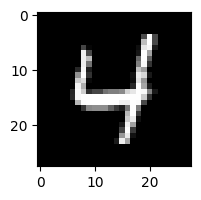

Predicted: 4, Actual: 4

Iter: 3


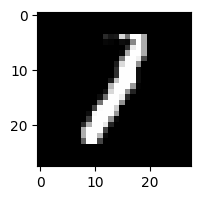

Predicted: 1, Actual: 1

Iter: 4


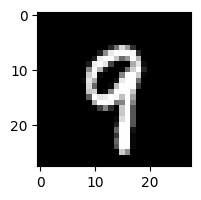

Predicted: 9, Actual: 9

Iter: 5


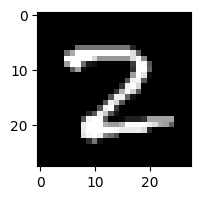

Predicted: 2, Actual: 2

Iter: 6


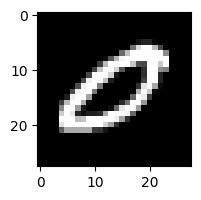

Predicted: 0, Actual: 0

Iter: 7


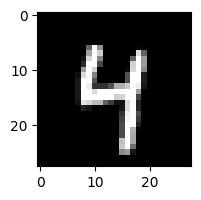

Predicted: 4, Actual: 4

Iter: 8


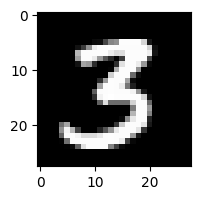

Predicted: 3, Actual: 3

Iter: 9


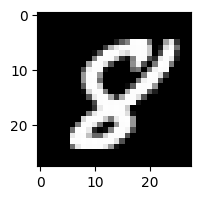

Predicted: 8, Actual: 8

Iter: 10


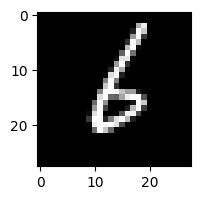

Predicted: 6, Actual: 6



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_4('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.001_lr.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with lr = 0.0001 Experiment**

**Define Class**

In [ ]:
class Net_5(nn.Module):
    def __init__(self):
        super(Net_5, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_5(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_5()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


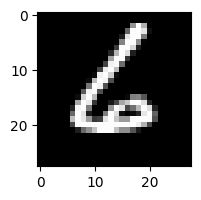

Predicted: 6, Actual: 6

Iter: 2


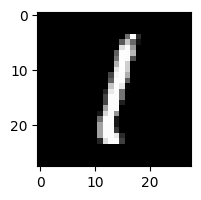

Predicted: 1, Actual: 1

Iter: 3


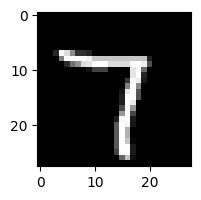

Predicted: 7, Actual: 7

Iter: 4


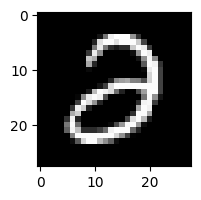

Predicted: 3, Actual: 2

Iter: 5


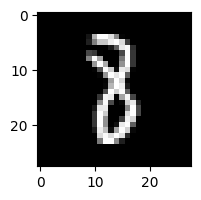

Predicted: 1, Actual: 8

Iter: 6


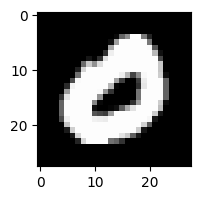

Predicted: 0, Actual: 0

Iter: 7


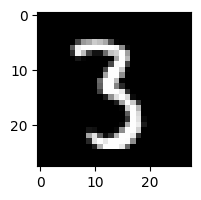

Predicted: 3, Actual: 3

Iter: 8


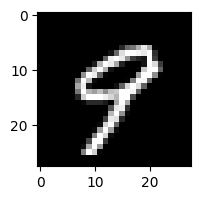

Predicted: 9, Actual: 9

Iter: 9


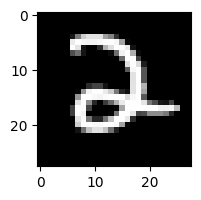

Predicted: 2, Actual: 2

Iter: 10


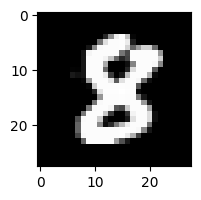

Predicted: 8, Actual: 8



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_5('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_0.0001_lr.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with ReLU Activation Function Experiment**

**Define Class**

In [ ]:
class Net_6(nn.Module):
    def __init__(self):
        super(Net_6, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_6(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_6()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


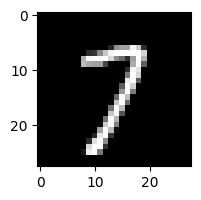

Predicted: 7, Actual: 7

Iter: 2


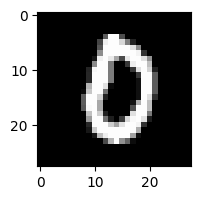

Predicted: 0, Actual: 0

Iter: 3


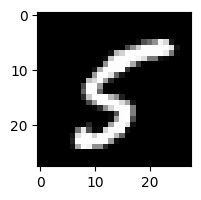

Predicted: 5, Actual: 5

Iter: 4


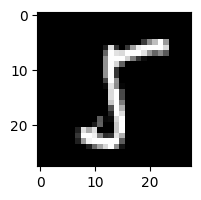

Predicted: 5, Actual: 5

Iter: 5


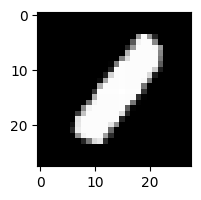

Predicted: 1, Actual: 1

Iter: 6


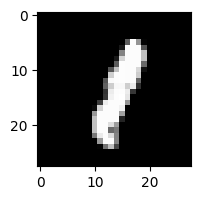

Predicted: 1, Actual: 1

Iter: 7


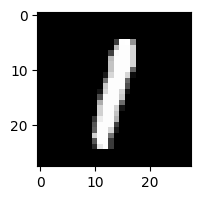

Predicted: 1, Actual: 1

Iter: 8


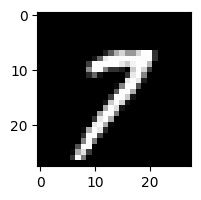

Predicted: 7, Actual: 7

Iter: 9


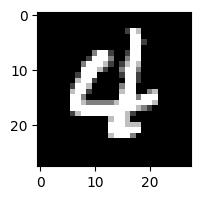

Predicted: 4, Actual: 4

Iter: 10


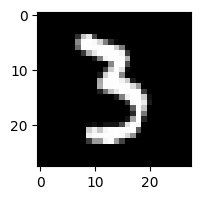

Predicted: 3, Actual: 3



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_6('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_relu.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with Tanh Activation Function Experiment**

**Define Class**

In [ ]:
class Net_7(nn.Module):
    def __init__(self):
        super(Net_7, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.tanh(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_7(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_7()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


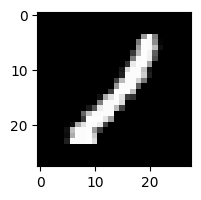

Predicted: 1, Actual: 1

Iter: 2


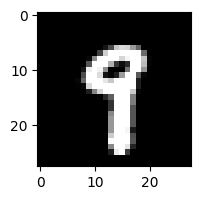

Predicted: 9, Actual: 9

Iter: 3


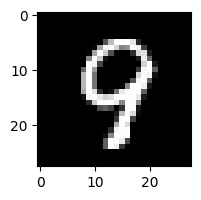

Predicted: 9, Actual: 9

Iter: 4


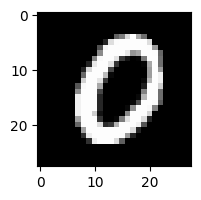

Predicted: 0, Actual: 0

Iter: 5


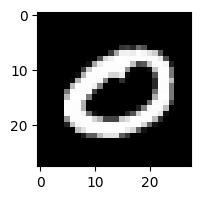

Predicted: 0, Actual: 0

Iter: 6


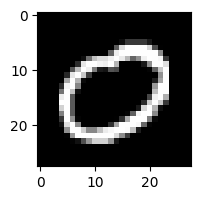

Predicted: 0, Actual: 0

Iter: 7


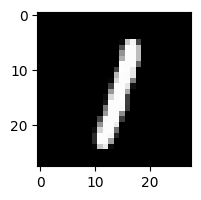

Predicted: 1, Actual: 1

Iter: 8


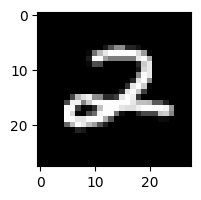

Predicted: 2, Actual: 2

Iter: 9


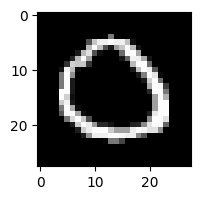

Predicted: 0, Actual: 0

Iter: 10


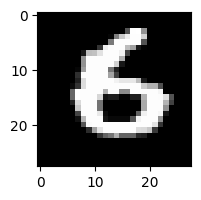

Predicted: 6, Actual: 6



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_7('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_tanh.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with Sigmoid Activation Function Experiment**

**Define Class**

In [ ]:
class Net_8(nn.Module):
    def __init__(self):
        super(Net_8, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.sigmoid(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_8(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_8()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


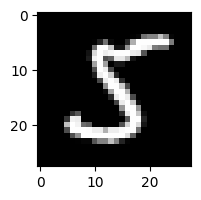

Predicted: 5, Actual: 5

Iter: 2


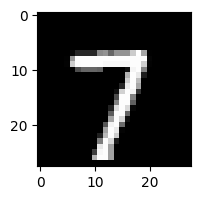

Predicted: 7, Actual: 7

Iter: 3


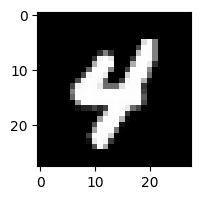

Predicted: 4, Actual: 4

Iter: 4


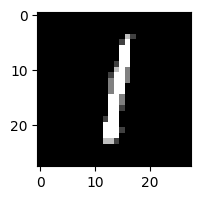

Predicted: 1, Actual: 1

Iter: 5


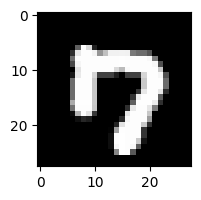

Predicted: 0, Actual: 7

Iter: 6


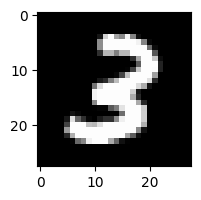

Predicted: 3, Actual: 3

Iter: 7


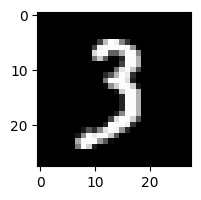

Predicted: 3, Actual: 3

Iter: 8


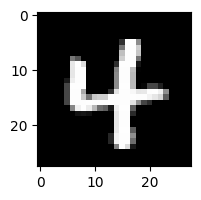

Predicted: 4, Actual: 4

Iter: 9


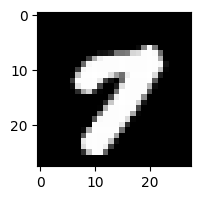

Predicted: 7, Actual: 7

Iter: 10


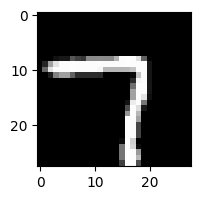

Predicted: 7, Actual: 7



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_8('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_sigmoid.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with PReLU Activation Function Experiment**

**Define Class**

In [ ]:
class Net_9(nn.Module):
    def __init__(self):
        super(Net_9, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.prelu(self.conv1(x), torch.full((20, ), 0.25))
        x = F.max_pool2d(x, 2, 2)
        x = F.prelu(self.conv2(x), torch.full((50, ), 0.25))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.prelu(self.fc1(x), torch.full((500, ), 0.25))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**



In [ ]:
def load_model_9(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_9()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


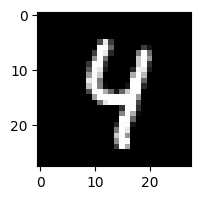

Predicted: 4, Actual: 4

Iter: 2


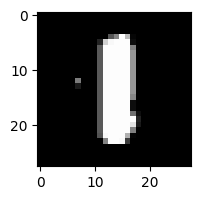

Predicted: 1, Actual: 1

Iter: 3


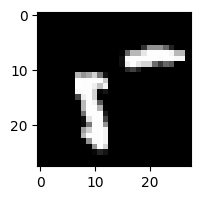

Predicted: 5, Actual: 5

Iter: 4


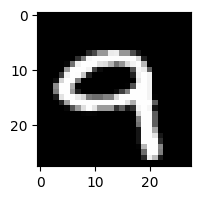

Predicted: 9, Actual: 9

Iter: 5


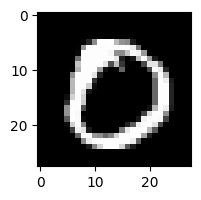

Predicted: 0, Actual: 0

Iter: 6


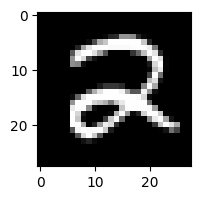

Predicted: 2, Actual: 2

Iter: 7


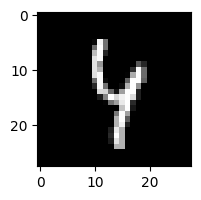

Predicted: 4, Actual: 4

Iter: 8


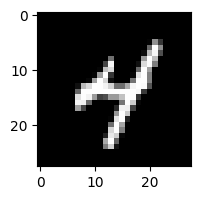

Predicted: 4, Actual: 4

Iter: 9


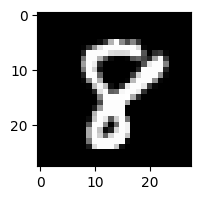

Predicted: 8, Actual: 8

Iter: 10


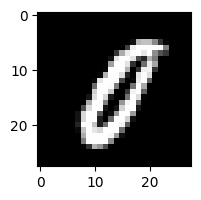

Predicted: 0, Actual: 0



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_9('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_prelu.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with Batch Norm for every Conv Layer Experiment**

**Define Class**

In [ ]:
class Net_10(nn.Module):
    def __init__(self):
        super(Net_10, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.batch_norm1= nn.BatchNorm2d(20)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.batch_norm2 = nn.BatchNorm2d(50)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_10(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_10()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**


Iter: 1


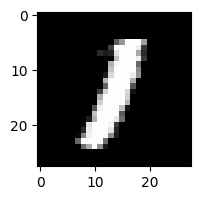

Predicted: 1, Actual: 1

Iter: 2


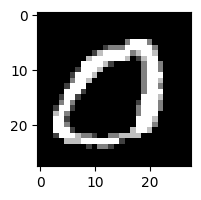

Predicted: 0, Actual: 0

Iter: 3


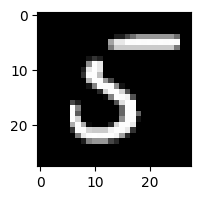

Predicted: 5, Actual: 5

Iter: 4


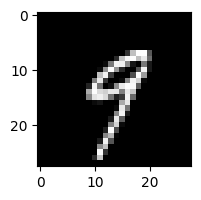

Predicted: 9, Actual: 9

Iter: 5


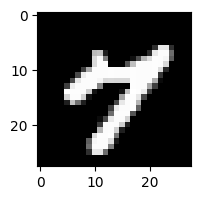

Predicted: 7, Actual: 7

Iter: 6


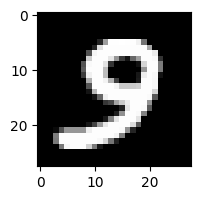

Predicted: 9, Actual: 9

Iter: 7


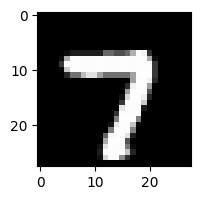

Predicted: 7, Actual: 7

Iter: 8


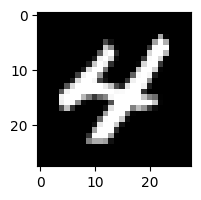

Predicted: 4, Actual: 4

Iter: 9


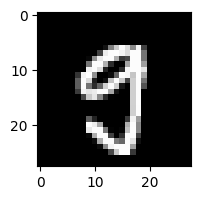

Predicted: 9, Actual: 9

Iter: 10


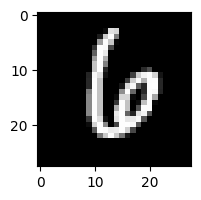

Predicted: 6, Actual: 6



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_10('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_batch_norm.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with 50% Dropout for fc1 Experiment**

**Define Class**

In [ ]:
class Net_11(nn.Module):
    def __init__(self):
        super(Net_11, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_11(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_11()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


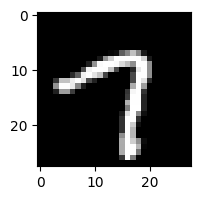

Predicted: 7, Actual: 7

Iter: 2


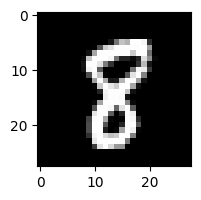

Predicted: 8, Actual: 8

Iter: 3


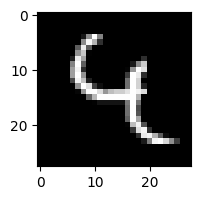

Predicted: 4, Actual: 4

Iter: 4


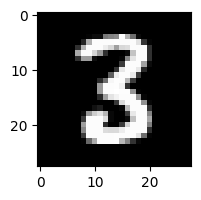

Predicted: 3, Actual: 3

Iter: 5


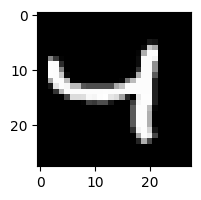

Predicted: 4, Actual: 4

Iter: 6


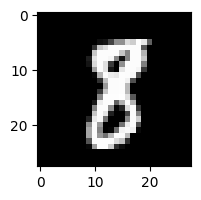

Predicted: 8, Actual: 8

Iter: 7


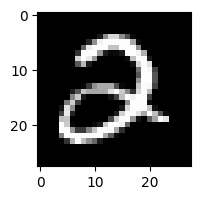

Predicted: 2, Actual: 2

Iter: 8


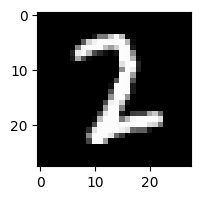

Predicted: 2, Actual: 2

Iter: 9


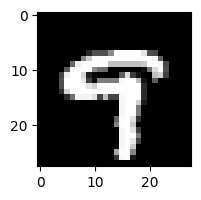

Predicted: 9, Actual: 9

Iter: 10


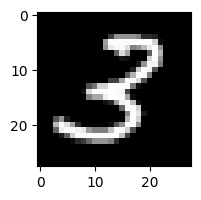

Predicted: 3, Actual: 3



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_11('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_50_dropout_fc1.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with 10% Dropout for fc1 Experiment**

**Define Class**

In [ ]:
class Net_12(nn.Module):
    def __init__(self):
        super(Net_12, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_12(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_12()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


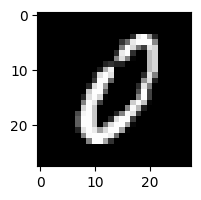

Predicted: 0, Actual: 0

Iter: 2


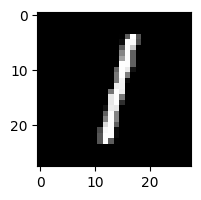

Predicted: 1, Actual: 1

Iter: 3


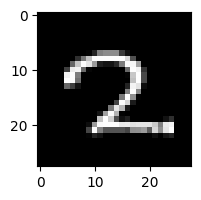

Predicted: 2, Actual: 2

Iter: 4


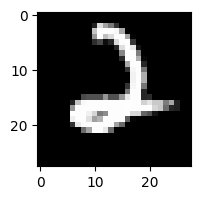

Predicted: 2, Actual: 2

Iter: 5


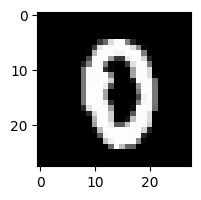

Predicted: 0, Actual: 0

Iter: 6


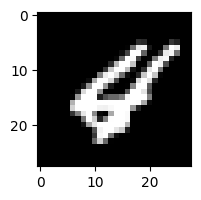

Predicted: 4, Actual: 4

Iter: 7


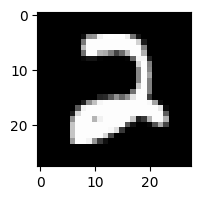

Predicted: 2, Actual: 2

Iter: 8


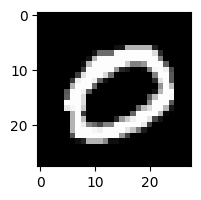

Predicted: 0, Actual: 0

Iter: 9


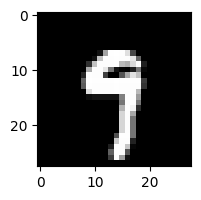

Predicted: 9, Actual: 9

Iter: 10


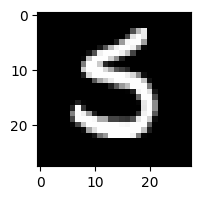

Predicted: 5, Actual: 5



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_12('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_10_dropout_fc1.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with 90% Dropout for fc1 Experiment**

**Define Class**

In [ ]:
class Net_13(nn.Module):
    def __init__(self):
        super(Net_13, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.dropout1 = nn.Dropout(0.9)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_13(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_13()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


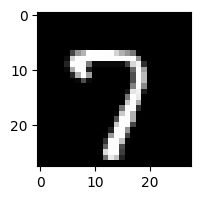

Predicted: 7, Actual: 7

Iter: 2


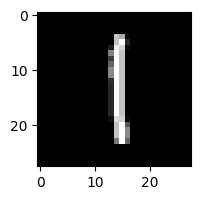

Predicted: 1, Actual: 1

Iter: 3


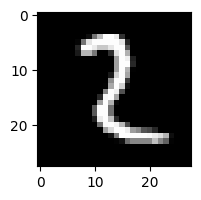

Predicted: 2, Actual: 2

Iter: 4


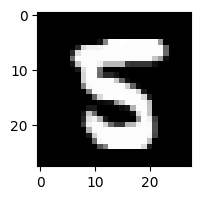

Predicted: 5, Actual: 5

Iter: 5


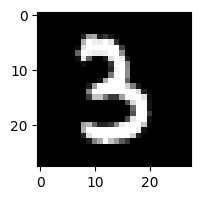

Predicted: 3, Actual: 3

Iter: 6


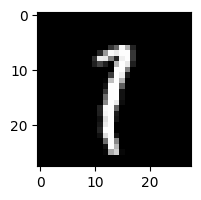

Predicted: 1, Actual: 1

Iter: 7


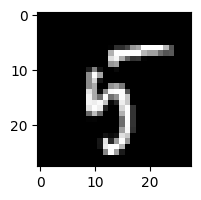

Predicted: 5, Actual: 5

Iter: 8


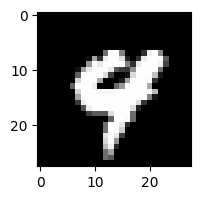

Predicted: 9, Actual: 4

Iter: 9


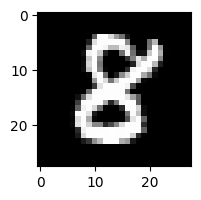

Predicted: 8, Actual: 8

Iter: 10


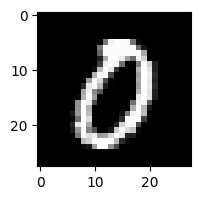

Predicted: 0, Actual: 0



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_13('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_90_dropout_fc1.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with RMSProp Optimizer Experiment**

**Define Class**

In [ ]:
class Net_14(nn.Module):
    def __init__(self):
        super(Net_14, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_14(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_14()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


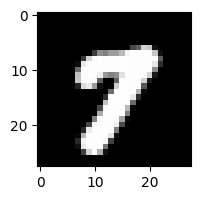

Predicted: 1, Actual: 7

Iter: 2


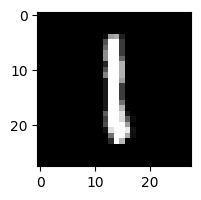

Predicted: 1, Actual: 1

Iter: 3


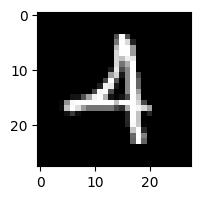

Predicted: 1, Actual: 4

Iter: 4


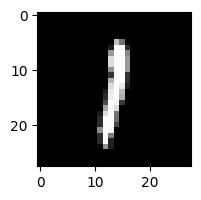

Predicted: 1, Actual: 1

Iter: 5


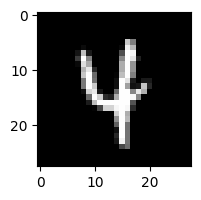

Predicted: 1, Actual: 4

Iter: 6


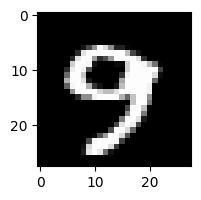

Predicted: 1, Actual: 9

Iter: 7


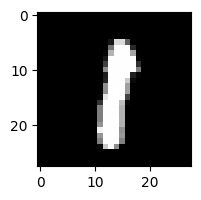

Predicted: 1, Actual: 1

Iter: 8


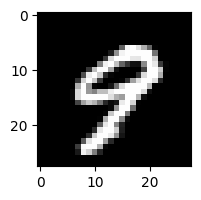

Predicted: 1, Actual: 9

Iter: 9


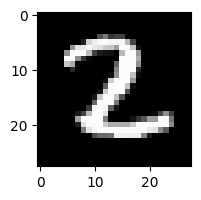

Predicted: 1, Actual: 2

Iter: 10


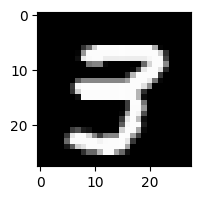

Predicted: 1, Actual: 3



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_14('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_RMSProp_optimizer.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with Adam Optimizer Experiment**

**Define Class**

In [ ]:
class Net_15(nn.Module):
    def __init__(self):
        super(Net_15, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_15(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_15()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


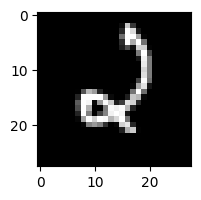

Predicted: 2, Actual: 2

Iter: 2


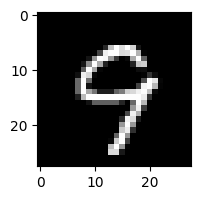

Predicted: 9, Actual: 9

Iter: 3


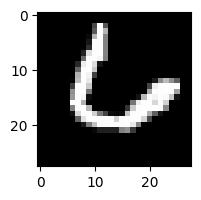

Predicted: 6, Actual: 6

Iter: 4


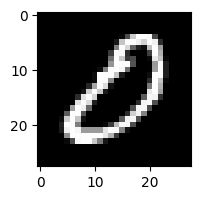

Predicted: 0, Actual: 0

Iter: 5


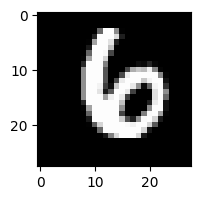

Predicted: 6, Actual: 6

Iter: 6


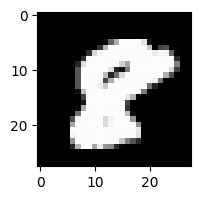

Predicted: 8, Actual: 8

Iter: 7


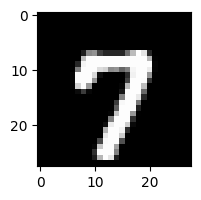

Predicted: 7, Actual: 7

Iter: 8


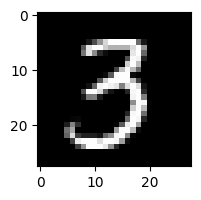

Predicted: 3, Actual: 3

Iter: 9


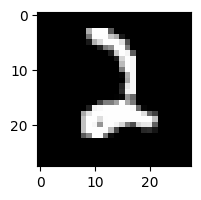

Predicted: 2, Actual: 2

Iter: 10


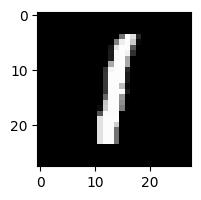

Predicted: 1, Actual: 1



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_15('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_Adam_optimizer.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()

# **Model with 3 Convolutional Layers Experiment**

**Define Class**

In [ ]:
class Net_16(nn.Module):
    def __init__(self):
        super(Net_16, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.conv3 = nn.Conv2d(50, 100, 3, 1)
        self.fc1 = nn.Linear(1*1*100, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 1*1*100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

**Load Model**

In [ ]:
def load_model_16(model_path: str):
    """
    Summary:
      Loads the trained model
    Args:
      model_path: path to the trained model
    Returns:
      loaded_model: trained model
    """

    if not Path(model_path).exists():
       raise FileNotFoundError('Incorrect Model Path')

    loaded_model = Net_16()
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)
    loaded_model.load_state_dict(state_dict)
    return loaded_model

**Main**

Iter: 1


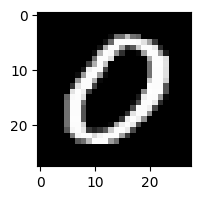

Predicted: 0, Actual: 0

Iter: 2


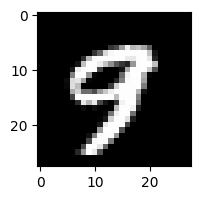

Predicted: 9, Actual: 9

Iter: 3


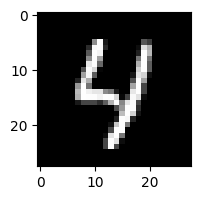

Predicted: 4, Actual: 4

Iter: 4


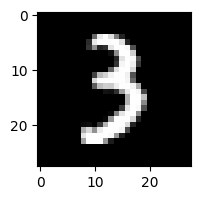

Predicted: 3, Actual: 3

Iter: 5


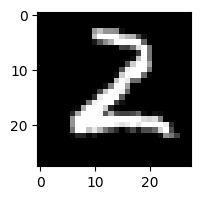

Predicted: 2, Actual: 2

Iter: 6


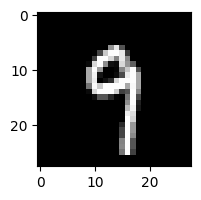

Predicted: 9, Actual: 9

Iter: 7


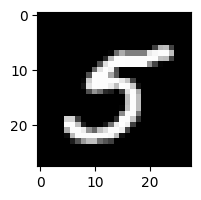

Predicted: 5, Actual: 5

Iter: 8


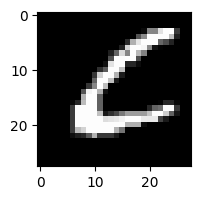

Predicted: 6, Actual: 6

Iter: 9


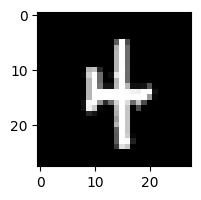

Predicted: 4, Actual: 4

Iter: 10


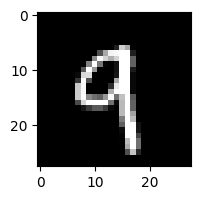

Predicted: 9, Actual: 9



In [ ]:
def main():
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')

    args, unknown = parser.parse_known_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

    test_loader = torch.utils.data.DataLoader(
            datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                          ])),
            batch_size=args.test_batch_size, shuffle=True, **kwargs)

    loaded_model = load_model_16('/content/drive/MyDrive/MNIST_CNN/mnist_cnn_3_conv_layers.pt')

    for index in range(10):
        print(f'Iter: {index + 1}')
        test(loaded_model, device, test_loader)
        print()

if __name__ == '__main__':
    main()